# **Data Analysis Project**: E-Commerce Public Dataset in Brazil
> Name : Salma Mardhiyah <br>
> Gmail : salmamardhy14@gmail.com <br>
> Id Dicoding : salma_mardhiyah <br>










## **Define Question**


1. How is the growth of Income from 2017 - 2018?
2. What are the 10 highest and lowest selling product categories?
3. What type of payment is most often used by customers?
4. Which customers are the best customers based on Monetary Value?

## **Librarys**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import calendar

## **Data Wrangling**


#### **1. Dataset Customers**

##### **Gathering Data**

Read and save `customers_dataset` to a dataframe named 'customers_df'

In [2]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


##### **Assessing Data**

In [3]:
# Show and check the summary of DataFrame
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
# Check the NaN value in DataFrame columns
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
# Find duplicate in DataFrame columns
print("Total duplicate values:", customers_df.duplicated().sum())

Total duplicate values: 0


In [6]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### **Cleaning Data**

1. Remove Irrelevant Data

In [7]:
customers_df_slice = customers_df.drop(columns=["customer_zip_code_prefix"])
customers_df_slice.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


#### **2. Dataset Order Items**

##### **Gathering Data**

Read and save `order_items_dataset` to a dataframe named 'order_items_df'

In [8]:
order_items_df = pd.read_csv('order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


##### **Assessing Data**

In [9]:
# Show and check the summary of DataFrame
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
# Check the NaN value in DataFrame columns
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [11]:
# Find duplicate in DataFrame columns
order_items_duplicated = order_items_df.duplicated()
print("Total duplicate values:", order_items_duplicated.sum())

Total duplicate values: 0


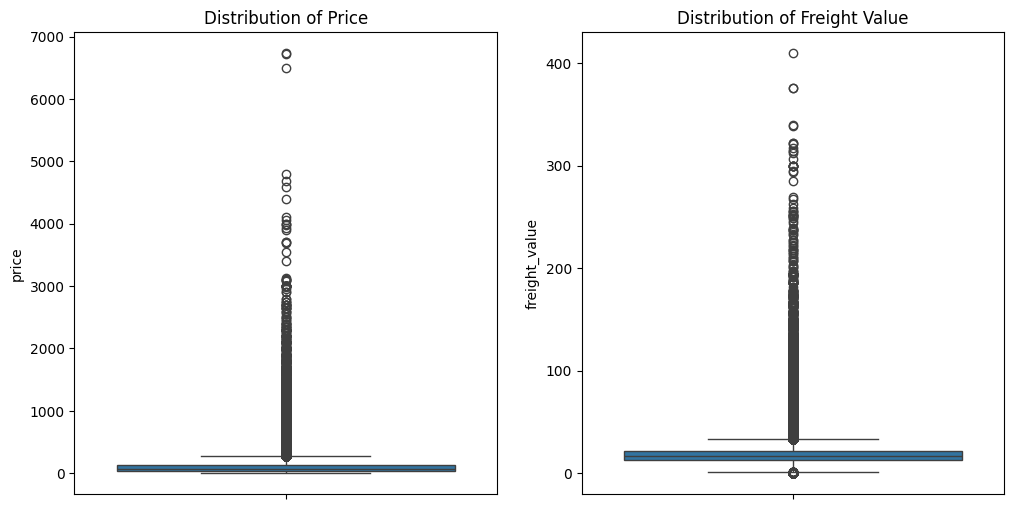

In [12]:
# Menampilkan boxplot untuk melihat outlier secara visual
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(order_items_df['price'])
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.boxplot(order_items_df['freight_value'])
plt.title('Distribution of Freight Value')

plt.show()

In [13]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### **Cleaning Data**

1. Change Format Data Type

In [14]:
# Change the format of order_item_id to data type object
order_items_df["order_item_id"] = order_items_df["order_item_id"].astype(str)
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  object 
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), object(5)
memory usage: 6.0+ MB


2. Remove Outliers

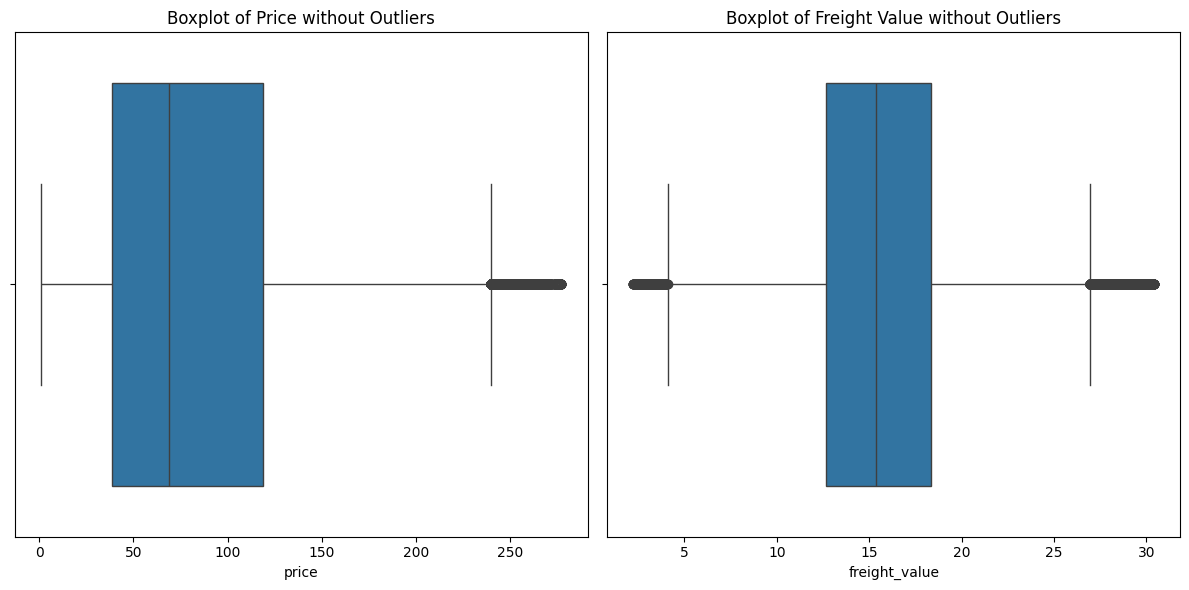

In [15]:
# Calculate interquartile
def remove_outliers(dataframe, column_name):
  # Menghitung quartile dan IQR
  Q1 = dataframe[column_name].quantile(0.25)
  Q3 = dataframe[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Menghitung batas atas dan batas bawah
  maximum = Q3 + (1.5 * IQR)
  minimum = Q1 - (1.5 * IQR)

  # Membuat kondisi untuk nilai di bawah batas bawah dan di atas batas atas
  lower_condition = dataframe[column_name] < minimum
  upper_condition = dataframe[column_name] > maximum

  # Menghapus outlier secara langsung pada DataFrame
  dataframe.drop(dataframe[lower_condition | upper_condition].index, inplace=True)

# Show Bloxplot after drop the outliers
plt.figure(figsize=(12, 6))

# Price
plt.subplot(1, 2, 1)
remove_outliers(order_items_df, 'price')
sns.boxplot(data=order_items_df, x='price')
plt.title("Boxplot of Price without Outliers")

# Freight Value
plt.subplot(1, 2, 2)
remove_outliers(order_items_df, 'freight_value')
sns.boxplot(data=order_items_df, x='freight_value')
plt.title("Boxplot of Freight Value without Outliers")
plt.tight_layout()
plt.show()

In [16]:
order_items_df['price'].describe()

count    93975.000000
mean        79.191667
std         55.980034
min          0.850000
25%         35.700000
50%         60.600000
75%        109.900000
max        277.000000
Name: price, dtype: float64

In [17]:
order_items_df['freight_value'].describe()

count    93975.000000
mean        15.751864
std          5.113773
min          2.240000
25%         12.660000
50%         15.350000
75%         18.370000
max         30.410000
Name: freight_value, dtype: float64

3. Remove Irrelevant Data

In [18]:
order_items_slice = order_items_df.drop(columns=["shipping_limit_date"])
order_items_slice.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


#### **3. Dataset Order Payments**

##### **Gathering Data**

Read and save `order_payments_dataset` dataset to a dataframe named 'order_payments_df'

In [19]:
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


##### **Assessing Data**

In [20]:
# Show and check the summary of DataFrame
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
# Check the NaN value in DataFrame columns
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [22]:
# Find duplicate in DataFrame columns
order_payments_duplicated = order_payments_df.duplicated()
print("Total duplicate values:", order_payments_duplicated.sum())

Total duplicate values: 0


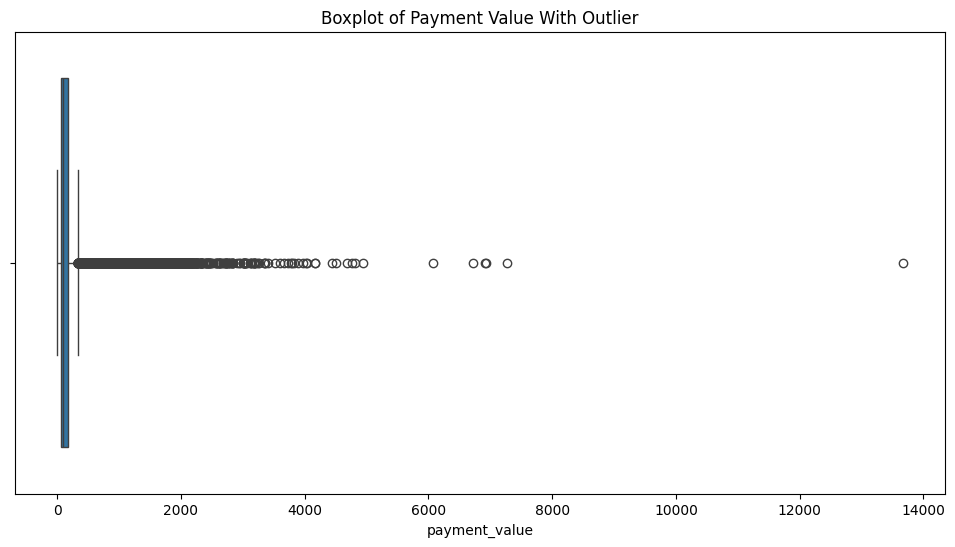

In [23]:
# Menampilkan boxplot untuk melihat outlier secara visual
plt.figure(figsize=(12, 6))
sns.boxplot(x = order_payments_df['payment_value'])
plt.title('Boxplot of Payment Value With Outlier')
plt.show()

In [24]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


##### **Cleaning Data**

1. Remove Outliers

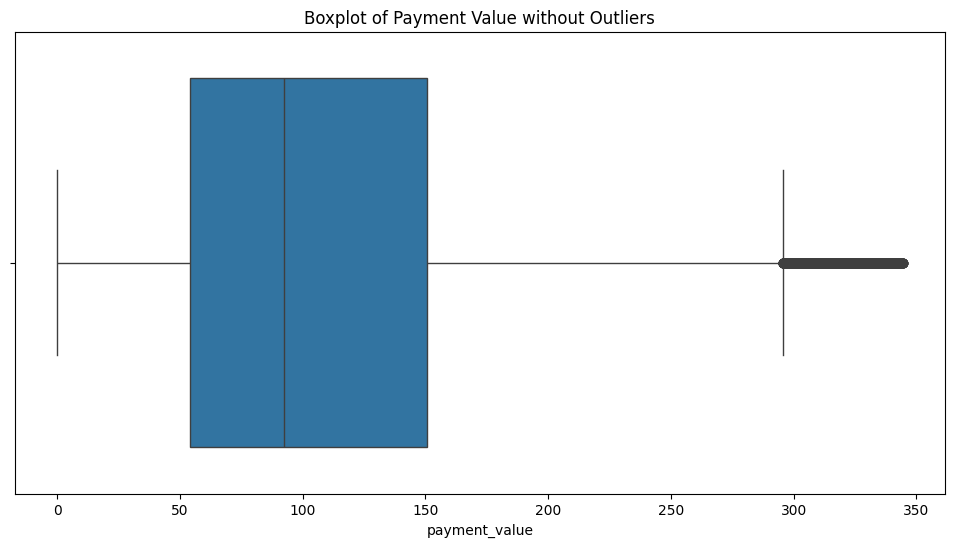

In [25]:
# Show Bloxplot after drop the outliers
plt.figure(figsize=(12, 6))
remove_outliers(order_payments_df, 'payment_value')
sns.boxplot(x=order_payments_df["payment_value"])
plt.title("Boxplot of Payment Value without Outliers")
plt.show()

In [26]:
order_payments_df["payment_value"].describe()

count    95905.000000
mean       110.062133
std         72.785054
min          0.000000
25%         54.000000
50%         92.200000
75%        150.580000
max        344.340000
Name: payment_value, dtype: float64

2. Remove Irrelevant Values

In [27]:
order_payments_df_slice = order_payments_df.drop(columns=["payment_sequential", "payment_installments"])
order_payments_df_slice.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


#### **4. Dataset Orders**

##### **Gathering Data**

Read and save `orders_dataset` to a dataframe named 'orders_df'

In [28]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


##### **Assessing Data**

In [29]:
# Show and check the summary of DataFrame
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [30]:
# Check the NaN value in DataFrame columns
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [31]:
# Find duplicate in DataFrame columns
orders_duplicated = orders_df.duplicated()
print("Total duplicate values:", orders_duplicated.sum())

Total duplicate values: 0


In [32]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### **Cleaning Data**

1. Change Format Data Type

In [33]:
# Change Data Type of datetime from object to datetime64[ns]
datetime_columns = ["order_purchase_timestamp", "order_approved_at",
                    "order_delivered_carrier_date", "order_delivered_customer_date",
                    "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


2. Fill NaT or missing value with Forward fill

In [34]:
orders_df.sort_values(by=["order_purchase_timestamp"], inplace=True)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25


In [35]:
# Forward fill untuk order_delivered_carrier_date
orders_df['order_delivered_carrier_date'].fillna(method='ffill', inplace=True)

# Forward fill untuk order_delivered_customer_date
orders_df['order_delivered_customer_date'].fillna(method='ffill', inplace=True)

In [36]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,2016-10-18 13:14:51,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,2016-10-18 13:14:51,NaT,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-25


In [37]:
# Backward Fill
orders_df['order_delivered_customer_date'].fillna(method='bfill', inplace=True)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-11-09 07:47:38,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,2016-10-18 13:14:51,2016-11-09 07:47:38,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,2016-10-18 13:14:51,2016-11-09 07:47:38,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-25


3. Remove Irrelevant Data

In [38]:
orders_df_slice = orders_df.drop(columns=["order_approved_at", "order_delivered_carrier_date"])
orders_df_slice.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-11-09 07:47:38,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-11-09 07:47:38,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-11-09 07:47:38,2016-09-30
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,2016-10-04
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-11-09 07:47:38,2016-10-25


#### **5. Dataset Product Category Name Translation**

##### **Gathering Data**

Read and save `product_category_name_translation` dataset to a dataframe named 'product_name_df'

In [39]:
product_name_df = pd.read_csv('product_category_name_translation.csv')
product_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


##### **Assessing Data**

In [40]:
# Show and check the summary of DataFrame
product_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [41]:
# Check the NaN value in DataFrame columns
product_name_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [42]:
# Find duplicate in DataFrame columns
product_name_duplicated = product_name_df.duplicated()
print("Total duplicate values:", product_name_duplicated.sum())

Total duplicate values: 0


In [43]:
product_name_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### **Cleaning Data**

Data telah bersih dan tidak ada yang perlu diperbaiki

#### **6. Dataset Products**

##### **Gathering Data**

Read and save `products_dataset` dataset to a dataframe named 'products_df'

In [44]:
products_df = pd.read_csv('products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


##### **Assessing Data**

In [45]:
# Show and check the summary of DataFrame
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [46]:
# Check the NaN value in DataFrame columns
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [47]:
# Find duplicate in DataFrame columns
products_duplicated = products_df.duplicated()
print("Total duplicate values:", products_duplicated.sum())

Total duplicate values: 0


In [48]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


##### **Cleaning Data**

1. Remove Irrelevant Data

In [49]:
# Using only columns 1 and 2
products_slice = products_df.iloc[:,:2]
products_slice.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


2. Filling the Missing Value

In [50]:
# Use Mode to Fill the NaN
products_slice["product_category_name"].fillna(products_slice["product_category_name"].mode()[0], inplace=True)
products_slice.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [51]:
products_slice.isna().sum()

product_id               0
product_category_name    0
dtype: int64

## **Exploratory Data Analysis (EDA)**


In [52]:
# Add a new column to help EDA
orders_df_slice['year']  = orders_df_slice['order_purchase_timestamp'].dt.strftime('%Y')
orders_df_slice['month'] = orders_df_slice['order_purchase_timestamp'].dt.strftime('%m')
orders_df_slice['year-month'] = orders_df_slice['order_purchase_timestamp'].dt.strftime('%Y-%m')
orders_df_slice.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,year,month,year-month
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-11-09 07:47:38,2016-10-20,2016,09,2016-09
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-11-09 07:47:38,2016-10-28,2016,09,2016-09
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-11-09 07:47:38,2016-09-30,2016,09,2016-09
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,2016-10-04,2016,09,2016-09
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-11-09 07:47:38,2016-10-25,2016,10,2016-10


### **Explore Data Frame of Order Item and Orders**

In [53]:
# Merge it
orders_merge = orders_df_slice.merge(order_items_slice, on="order_id")
orders_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93975 entries, 0 to 93974
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93975 non-null  object        
 1   customer_id                    93975 non-null  object        
 2   order_status                   93975 non-null  object        
 3   order_purchase_timestamp       93975 non-null  datetime64[ns]
 4   order_delivered_customer_date  93975 non-null  datetime64[ns]
 5   order_estimated_delivery_date  93975 non-null  datetime64[ns]
 6   year                           93975 non-null  object        
 7   month                          93975 non-null  object        
 8   year-month                     93975 non-null  object        
 9   order_item_id                  93975 non-null  object        
 10  product_id                     93975 non-null  object        
 11  seller_id      

#### **Number of orders by year**

In [54]:
orders_merge.groupby(by="year").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,year,order_id
0,2018,44361
1,2017,37562
2,2016,263


#### **Number of orders by month**

In [55]:
orders_merge.groupby(by="month").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,month,order_id
0,08,9034
1,05,8641
2,07,8399
3,03,8217
4,06,7650
5,04,7643
6,02,7243
7,01,6795
8,11,6235
9,12,4790


#### **Number of orders by Status**

In [56]:
orders_merge.groupby(by=["year", "order_status"]).agg({"order_id": "nunique"})

order_id
year order_status          
2016 canceled            11
     delivered          228
     invoiced            13
     processing           1
     shipped              6
     unavailable          4
2017 approved             2
     canceled           145
     delivered        36659
     invoiced           142
     processing         174
     shipped            440
2018 canceled           202
     delivered        43585
     invoiced            89
     processing          45
     shipped            440

Even though the highest total number of orders occurred in November 2017 with the number 6235, if assessed as a whole from year to year, 2018 still shows better total orders compared to 2016 and 2017. This can be seen in the table of number of orders by month and status, where the top ten entries were dominated by 2018 which had 8 entries with deliveries reaching 6,926 more than before, while 2017 only had 2 entries.



### **Explore Data Frame Order Payments with the Order_merge**

In [57]:
# Merge it
orders_merge = orders_merge.merge(order_payments_df_slice, on="order_id")
orders_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94786 entries, 0 to 94785
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94786 non-null  object        
 1   customer_id                    94786 non-null  object        
 2   order_status                   94786 non-null  object        
 3   order_purchase_timestamp       94786 non-null  datetime64[ns]
 4   order_delivered_customer_date  94786 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94786 non-null  datetime64[ns]
 6   year                           94786 non-null  object        
 7   month                          94786 non-null  object        
 8   year-month                     94786 non-null  object        
 9   order_item_id                  94786 non-null  object        
 10  product_id                     94786 non-null  object        
 11  seller_id      

In [58]:
# Check total income per year
orders_merge.groupby(by='year').agg(Income=('payment_value', "sum")).sort_values(by='Income', ascending=False).reset_index().head(10)

,year,Income
0,2018,5477071.71
1,2017,4573211.44
2,2016,32488.98


The results obtained in the pivot table above show the same results with the "Explore Data Frame Order Payments with the Order_merge" section where 2018 remained higher than other both in the number of orders or income earned.

### **Explore Data Frame Products with the Order_merge**

In [59]:
# Merge it
orders_merge= orders_merge.merge(products_slice, on="product_id")
orders_merge = orders_merge.merge(product_name_df, on="product_category_name")
orders_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94767 entries, 0 to 94766
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94767 non-null  object        
 1   customer_id                    94767 non-null  object        
 2   order_status                   94767 non-null  object        
 3   order_purchase_timestamp       94767 non-null  datetime64[ns]
 4   order_delivered_customer_date  94767 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94767 non-null  datetime64[ns]
 6   year                           94767 non-null  object        
 7   month                          94767 non-null  object        
 8   year-month                     94767 non-null  object        
 9   order_item_id                  94767 non-null  object        
 10  product_id                     94767 non-null  object        
 11  seller_id      

In [60]:
orders_merge.groupby(by=["product_category_name_english"]).agg({
    "price": ["min", "max", "sum"],
    "order_id": "nunique"}).sort_values(by=('order_id', 'nunique'), ascending=False).reset_index().head(10)

product_category_name_english price                    order_id
                                  min     max        sum  nunique
0                bed_bath_table  3.00  274.90  964165.15     9804
1                 health_beauty  1.20  277.00  629823.15     7222
2                sports_leisure  4.50  272.90  626407.12     6633
3         computers_accessories  3.90  277.00  511627.00     5578
4               furniture_decor  4.90  276.00  462754.31     5219
5                    housewares  3.06  269.00  388790.43     4951
6                 watches_gifts  8.99  276.00  523312.11     4179
7                     telephony  5.00  274.99  186070.02     3801
8                          toys  4.90  275.00  303490.35     3312
9                          auto  3.49  276.99  279800.34     3117

bed_bath_table, health_beauty, sports leisure, computers accessories, and furniture decor are the categories with the highest number of sales in the 2016-2018 period.

### **Explore Data Frame Customers with the Order_merge**

In [61]:
# Merge it
orders_merge = orders_merge.merge(customers_df_slice, on="customer_id")
orders_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94767 entries, 0 to 94766
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94767 non-null  object        
 1   customer_id                    94767 non-null  object        
 2   order_status                   94767 non-null  object        
 3   order_purchase_timestamp       94767 non-null  datetime64[ns]
 4   order_delivered_customer_date  94767 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94767 non-null  datetime64[ns]
 6   year                           94767 non-null  object        
 7   month                          94767 non-null  object        
 8   year-month                     94767 non-null  object        
 9   order_item_id                  94767 non-null  object        
 10  product_id                     94767 non-null  object        
 11  seller_id      

In [62]:
orders_merge.groupby(by=["customer_city", "year"]).agg({
    "price": "sum",
    "order_id": "nunique"
}).sort_values(by="price", ascending=False).reset_index().head(10)

,customer_city,year,price,order_id
0,sao paulo,2018,690137.01,8021
1,sao paulo,2017,488866.96,5592
2,rio de janeiro,2018,261630.91,2860
3,rio de janeiro,2017,258361.60,2739
4,belo horizonte,2018,123415.55,1336
5,brasilia,2018,91199.18,994
6,belo horizonte,2017,89962.31,1039
7,brasilia,2017,68235.99,755
8,curitiba,2018,64687.33,720
9,campinas,2018,60328.81,707


The result above presents a comprehensive table of the top 10 performing customer cities over the 2017 to 2018 period, based on aggregate sales data. Sao Paulo emerged as the leading city in both years, showing strong sales figures of 690,137.01 in 2018 and R488,866.96 in 2017, with orders of 8,021 and 5,592 respectively. Rio de Janeiro followed closely, securing second place in both years, showing noteworthy sales values of 261,630.91 in 2018 and 258,361.60 in 2017, coupled with 2,860 and 2,739 unique orders respectively.

In [63]:
orders_merge[orders_merge['customer_city'] == 'sao paulo'].groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": "sum"
}).sort_values(by='order_id', ascending=False).reset_index().head(10)

,product_category_name_english,order_id,price
0,bed_bath_table,1789,168780.66
1,health_beauty,1369,114636.44
2,sports_leisure,1164,100843.70
3,housewares,986,75123.32
4,computers_accessories,894,85086.62
5,furniture_decor,887,77794.08
6,watches_gifts,611,71761.02
7,toys,545,48191.48
8,telephony,543,27191.98
9,auto,460,38234.72


The table above represents the categories most frequently ordered by customers in the city of Sao Paulo, which is the city with the highest number of orders and income compared to other cities.

## **Visualization & Explanatory Analysis**


> ####  **How is the growth of income from 2017 - 2018?**

In [64]:
pivot_table = pd.pivot_table(orders_merge, values='payment_value', index='month', columns='year', aggfunc='sum')
pivot_table = pivot_table.rename_axis(columns={'year': 'payment_value'})
pivot_table = pivot_table.reindex(sorted(pivot_table.columns), axis=1)
pivot_table

payment_value,2016,2017,2018
month,,,
01,NaN,83396.74,758142.67
02,NaN,174601.28,708834.88
03,NaN,275627.18,741005.91
04,NaN,243901.24,705178.28
05,NaN,374036.98,705334.71
06,NaN,310988.55,616486.96
07,NaN,403148.55,610074.41
08,NaN,444547.77,630567.26
09,75.06,430921.01,166.46


To avoid misinterpretation and in accordance with the principles of data visualization, the data used is only from January - August 2017 and 2018

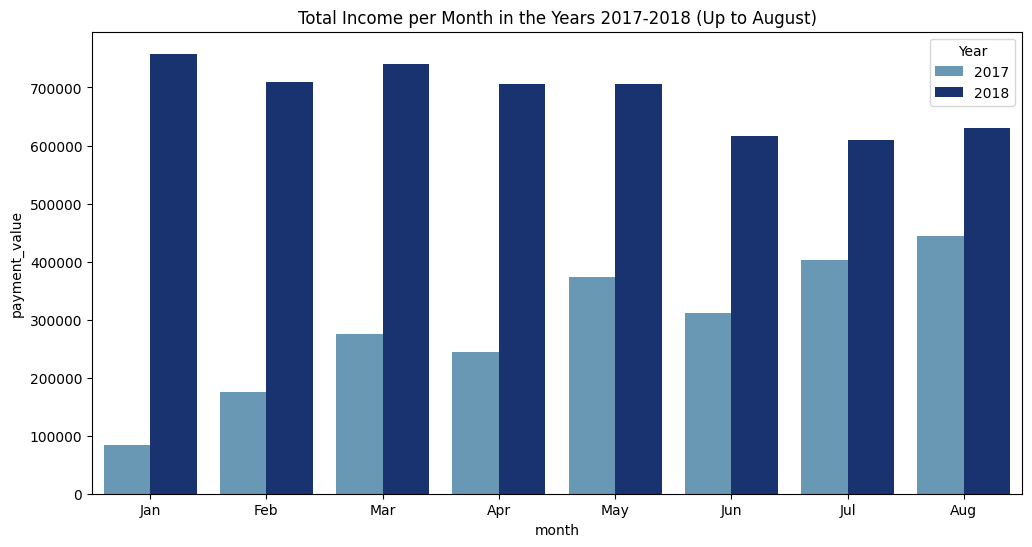

In [65]:
# Filter data for the years 2017 and 2018 up to August
income_2017_2018 = orders_merge[(orders_merge['year'].isin(['2017', '2018'])) & (orders_merge['month'] <= '08')]

# Calculate total income per month and year
monthly_income_2017_2018_august = income_2017_2018.groupby(['year', 'month'])['payment_value'].sum().reset_index()

# Convert numerical month to month names
monthly_income_2017_2018_august['month'] = monthly_income_2017_2018_august['month'].astype(int).apply(lambda x: calendar.month_abbr[x])

# Create a Clustered Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='payment_value', hue='year', data=monthly_income_2017_2018_august, palette=['#5c9cbf', '#0a2d7d'])
plt.title('Total Income per Month in the Years 2017-2018 (Up to August)')
plt.legend(title='Year')
plt.show()

In [66]:
# Calculate percentage of income for each year
year = ['2017', '2018']
total_income_per_year = orders_merge[orders_merge['year'].isin(year)].groupby('year')['payment_value'].sum()
percentage = round(((total_income_per_year['2018'] - total_income_per_year['2017']) / total_income_per_year['2017']) * 100, 2)

# Check if both years are present before calculating percentage increase
if percentage > 0:
  print("Percentage increase from 2017 to 2018:", percentage)
elif percentage < 0:
  print("Decrease in income from the previous year to the next year:", percentage)
else:
  print(f"No change in income from the {year[0]} to {year[1]}")

Percentage increase from 2017 to 2018: 19.75


From the graph above, it is shown that income from 2017 to 2018 has increased, where the biggest difference is seen in January. Of overall income, 2018 experienced an increase of 19.75 from 2017. However, in 2017 it tended to increase every month while 2018 tended to be stagnant and decreased slightly

> ####  **What are the 10 highest and lowest selling product categories?**



In [67]:
# Top 10 categories with the highest number of sales
top_product_category = orders_merge.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False)

# Top 10 categories with the lowest number of sales
lowest_product_category = orders_merge.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=True)

Top 10 highest selling product category is
1. bed_bath_table
2. health_beauty
3. sports_leisure
4. computers_accessories
5. furniture_decor
6. housewares
7. watches_gifts
8. telephony
9. toys
10. auto

The most highest category is bed_bath_table with 9804 



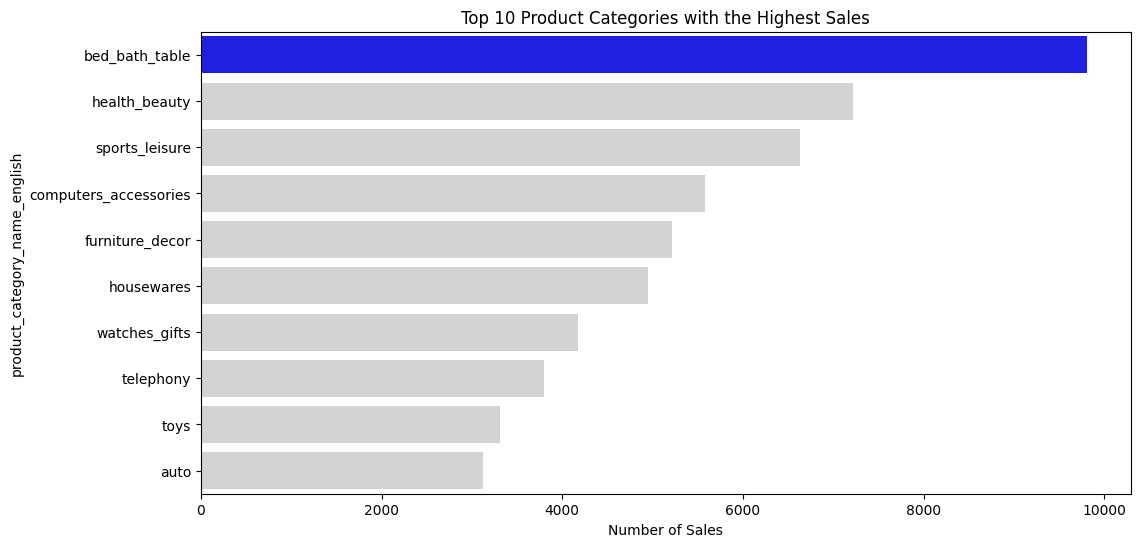

In [68]:
# Find the highest value and its index
highest_index = top_product_category.idxmax()
highest_position = top_product_category.index.get_loc(highest_index)

# Print the Top 10
print("Top 10 highest selling product category is")
for index, category in enumerate(top_product_category.index[:10], start=1):
    print(f"{index}. {category}")
print("\nThe most highest category is", top_product_category.index[0], "with", top_product_category.values[0], "\n")

# Plot
colors = ["blue"] + ['lightgrey'] * 9
plt.figure(figsize=(12, 6))
sns.barplot(x=top_product_category.values[:10], y=top_product_category.index[:10], hue=top_product_category.index[:10], palette=colors, orient="h", dodge=False, legend=False)
plt.xlabel("Number of Sales")
plt.title("Top 10 Product Categories with the Highest Sales")
plt.show()


Top 10 lowest selling product category is
1. computers
2. security_and_services
3. furniture_mattress_and_upholstery
4. fashion_childrens_clothes
5. la_cuisine
6. cds_dvds_musicals
7. arts_and_craftmanship
8. home_comfort_2
9. fashion_sport
10. diapers_and_hygiene

The most lowest category is computers with 1 



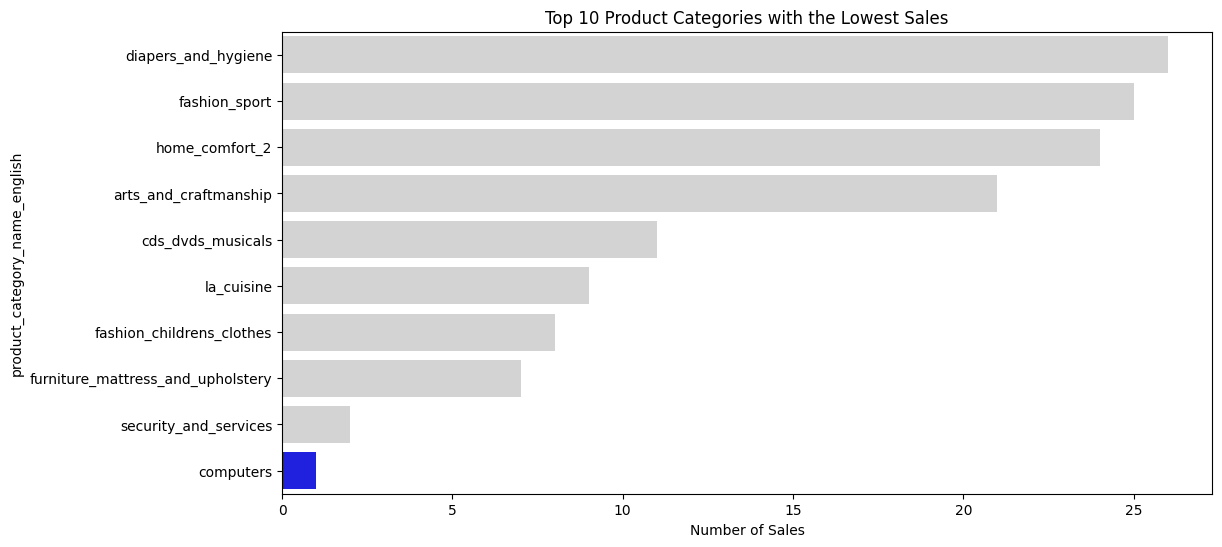

In [69]:
# Find the lowest value and its index
lowest_index = lowest_product_category.idxmax()
lowest_position = lowest_product_category.index.get_loc(lowest_index)

# Print the Top 10 - Lowest
print("Top 10 lowest selling product category is")
for index, category in enumerate(lowest_product_category.index[:10], start=1):
    print(f"{index}. {category}")
print("\nThe most lowest category is", lowest_product_category.index[0], "with", lowest_product_category.values[0], "\n")

# Plot
colors = ['lightgrey'] * 9  + ["blue"]
plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_product_category.values[9::-1], y=lowest_product_category.index[9::-1], hue=lowest_product_category.index[:10], palette=colors, orient="h", dodge=False, legend=False)
plt.xlabel("Number of Sales")
plt.title("Top 10 Product Categories with the Lowest Sales")
plt.show()

From the two bar graphs above, it can be analyzed that bed_bath_table is the most sold category with 9804 pieces for every order_id while computers is the least sold category with only 1 piece.

> ####  **3. What type of payment is most often used by customers?**

In [70]:
payment_type = orders_merge.groupby(by="payment_type")["order_id"].nunique().reset_index()
payment_type

,payment_type,order_id
0,boleto,16563
1,credit_card,61818
2,debit_card,1296
3,voucher,3249


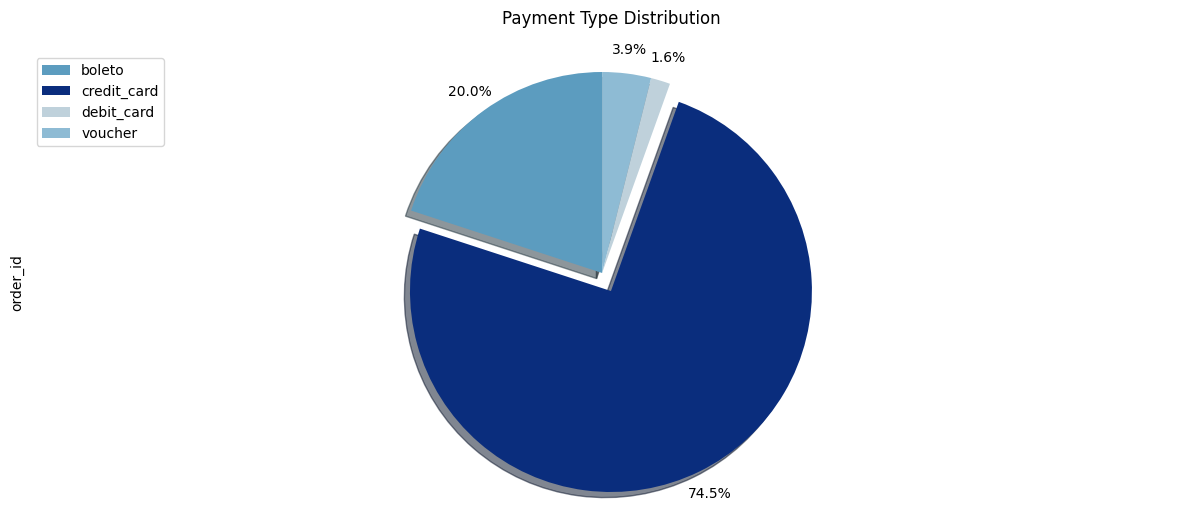

In [71]:
colors_list = ['#5c9cbf', '#0a2d7d', '#bfd1db' , '#8ebbd4']
explode_list = [0, 0.1, 0, 0] # ratio for each continent with which to offset each wedge.

payment_type["order_id"].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title("Payment Type Distribution", pad=20)
plt.axis('equal')
plt.legend(labels=payment_type["payment_type"], loc='upper left')
plt.show()

Credit cards are the type of payment most often chosen by customers when making payment transactions with 74.5% compared to boleto which is only 20% followed by vouchers and debit cards at 3.9% and 1.6%.

> ####  **4. Which customers are the best customers, and how are customers segmented based on their last order, order frequency, and total order value?**

**RFM Analysis**

In [72]:
orders_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94767 entries, 0 to 94766
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94767 non-null  object        
 1   customer_id                    94767 non-null  object        
 2   order_status                   94767 non-null  object        
 3   order_purchase_timestamp       94767 non-null  datetime64[ns]
 4   order_delivered_customer_date  94767 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94767 non-null  datetime64[ns]
 6   year                           94767 non-null  object        
 7   month                          94767 non-null  object        
 8   year-month                     94767 non-null  object        
 9   order_item_id                  94767 non-null  object        
 10  product_id                     94767 non-null  object        
 11  seller_id      

In [73]:
# Create a new column that represent the monetary value of each order
orders_merge['order_item_id'] = orders_merge['order_item_id'].astype(int)
orders_merge["total_price"] = orders_merge["price"] * orders_merge["order_item_id"]
orders_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94767 entries, 0 to 94766
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94767 non-null  object        
 1   customer_id                    94767 non-null  object        
 2   order_status                   94767 non-null  object        
 3   order_purchase_timestamp       94767 non-null  datetime64[ns]
 4   order_delivered_customer_date  94767 non-null  datetime64[ns]
 5   order_estimated_delivery_date  94767 non-null  datetime64[ns]
 6   year                           94767 non-null  object        
 7   month                          94767 non-null  object        
 8   year-month                     94767 non-null  object        
 9   order_item_id                  94767 non-null  int64         
 10  product_id                     94767 non-null  object        
 11  seller_id      

In [74]:
rfm_df = orders_merge.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max",
    "order_id": "nunique",
    "total_price": "sum"})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Convert max_order_timestamp to date
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

# The most recent date in 'order_purchase_timestamp'
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()

# Calculate recency
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


In [75]:
rfm_df.describe()

,frequency,monetary,recency
count,81070.0,81070.000000,81070.000000
mean,1.0,98.269161,291.790564
std,0.0,96.308203,153.465945
min,1.0,0.850000,44.000000
25%,1.0,40.000000,168.000000
50%,1.0,75.000000,273.000000
75%,1.0,129.900000,402.000000
max,1.0,6836.400000,772.000000


In [76]:
# Sort by recency
rfm_df.sort_values(by='recency', ascending=True).head()

,customer_id,frequency,monetary,recency
23922,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,44
62540,c4c66f47534e09a03fc7a878a9eda5ea,1,65.00,49
43436,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,49
72435,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,49
27406,56b1ac2855cc6d7950b4ffa6a9b41b0d,1,109.90,49


<ipython-input-77-bac2fd357ed0>:8: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


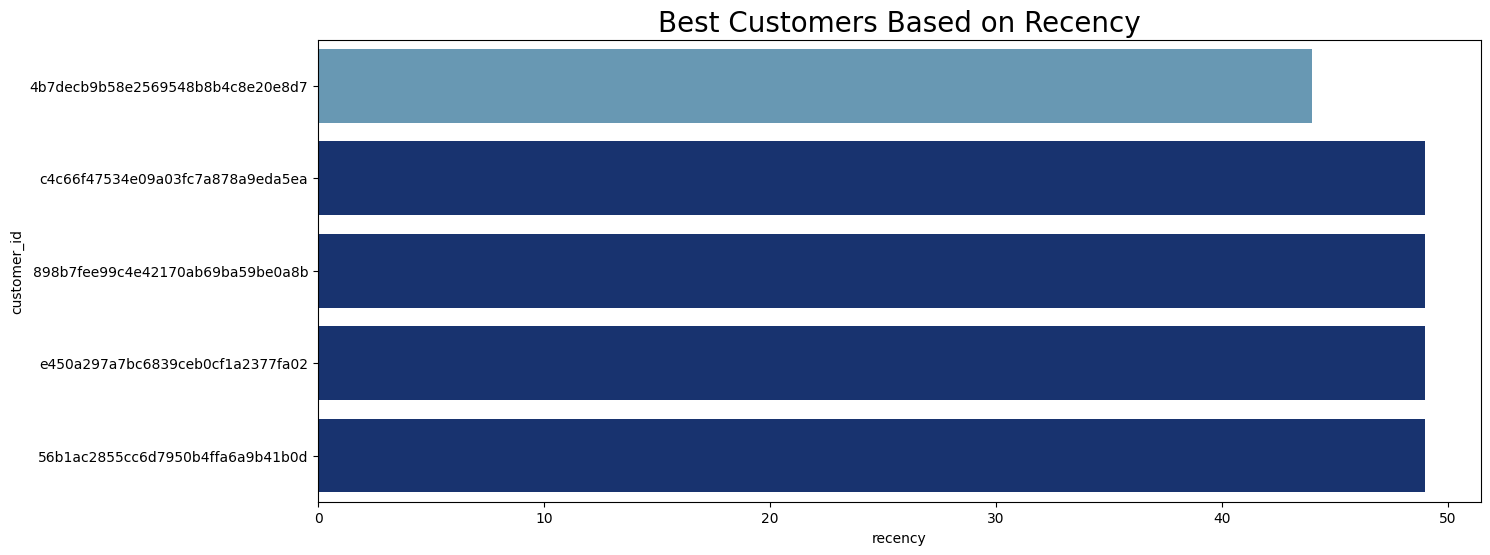

In [77]:
#  Identify the best customer based on recency parameters
plt.figure(figsize=(15, 6))

# Use a color palette
colors = ['#5c9cbf', '#0a2d7d', '#bfd1db' , '#8ebbd4', '#1a506e']

# Plot for Recency
sns.barplot(
    y="customer_id",
    x="recency", data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors, hue="recency", legend=False)
plt.title("Best Customers Based on Recency", fontsize=20)
plt.show()

<ipython-input-78-6f2032a8aa5c>:8: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.barplot(


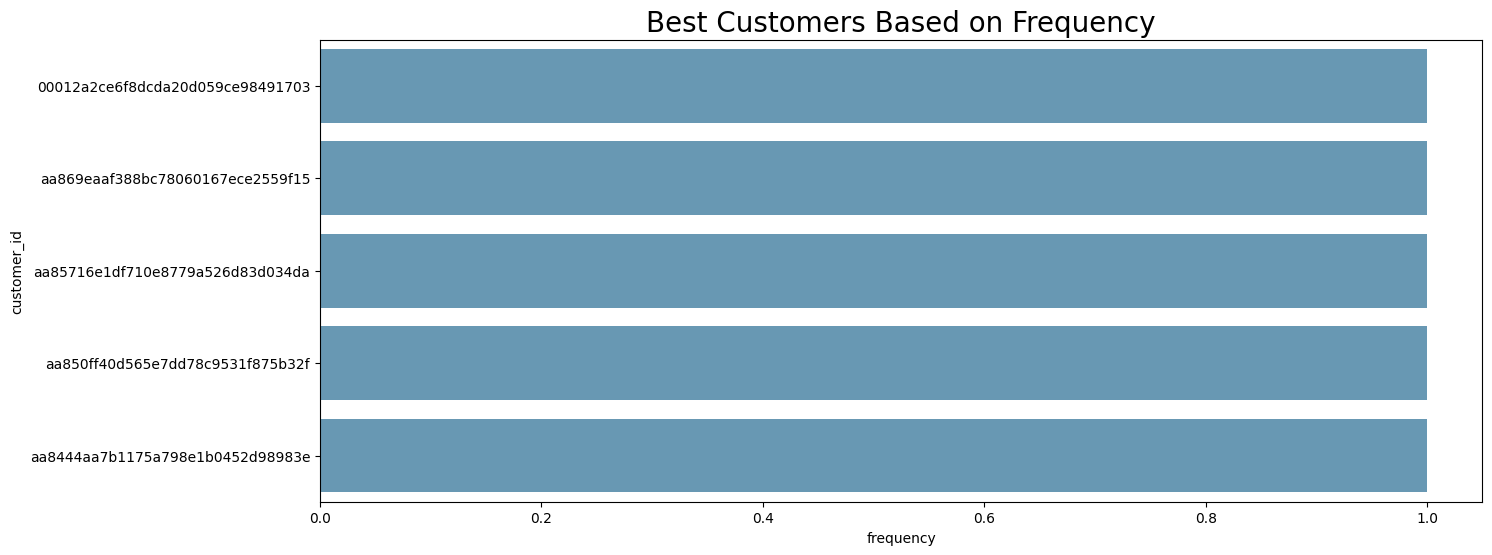

In [78]:
#  Identify the best customer based on frequency parameters
plt.figure(figsize=(15, 6))

# Use a color palette
colors = ['#5c9cbf', '#0a2d7d', '#bfd1db' , '#8ebbd4', '#1a506e']

# Plot for Recency
sns.barplot(
    y="customer_id",
    x="frequency", data=rfm_df.sort_values(by="frequency", ascending=True).head(5),
    palette=colors, hue="frequency", legend=False)
plt.title("Best Customers Based on Frequency", fontsize=20)
plt.show()

<ipython-input-79-a0bfe5c57acc>:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


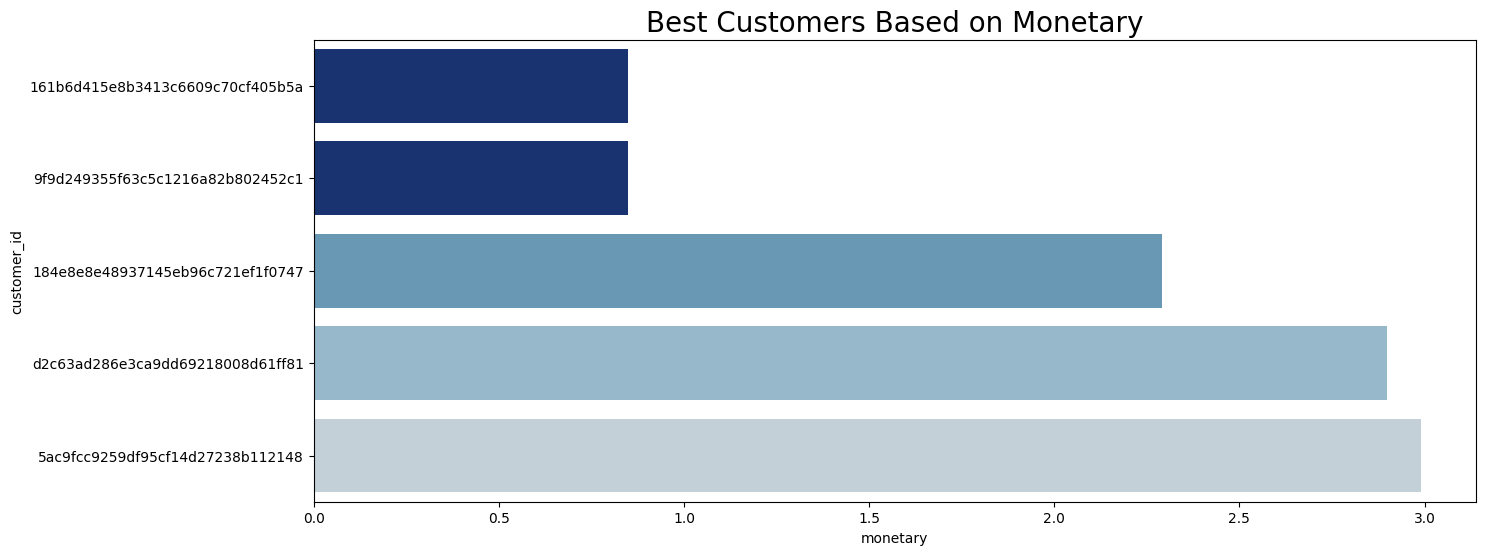

In [79]:
#  Identify the best customer based on Monetory parameters
plt.figure(figsize=(15, 6))

# Use a color palette
colors = ['#0a2d7d', '#5c9cbf', '#8ebbd4', '#bfd1db' , '#1a506e']

# Plot for Recency
sns.barplot(
    y="customer_id",
    x="monetary", data=rfm_df.sort_values(by="monetary", ascending=True).head(5),
    palette=colors, hue="monetary", legend=False)
plt.title("Best Customers Based on Monetary", fontsize=20)
plt.show()

In [80]:
# Ranking customers based on recency, frequency, and monetary scores
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)

# Normalizing customer rankings
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency,R_rank_norm,F_rank_norm,M_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34.705810,100.0,50.000617
1,000161a058600d5901f007fab4c27140,1,54.90,458,17.144443,100.0,50.000617
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2.881460,100.0,50.000617
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21.585667,100.0,50.000617
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,68.083755,100.0,50.000617


In [81]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm'] + 0.28 *rfm_df['F_rank_norm'] + 0.57*rfm_df['M_rank_norm'] #Weighting pada masing-masing parameter
rfm_df['RFM_Score'] = (0.05*rfm_df['RFM_Score']).round(2) #Mengubah nilai RFM Score menjadi nilai dengan maksimal 5 dan membulatkannya hingga 2 desimal

rfm_df = rfm_df[['customer_id', 'recency','frequency','monetary','RFM_Score']]
rfm_df.head()

,customer_id,recency,frequency,monetary,RFM_Score
0,00012a2ce6f8dcda20d059ce98491703,337,1,89.80,3.09
1,000161a058600d5901f007fab4c27140,458,1,54.90,2.95
2,0001fd6190edaaf884bcaf3d49edf079,596,1,179.99,2.85
3,0002414f95344307404f0ace7a26f1d5,427,1,149.90,2.99
4,000379cdec625522490c315e70c7a9fb,198,1,93.00,3.34


**Based on Monetary**

<ipython-input-82-e90d17f7dc53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RFM_Score", y="customer_id", data= rfm_df.sort_values(by=['RFM_Score', 'monetary'],ascending=False).head(10), palette=colors)


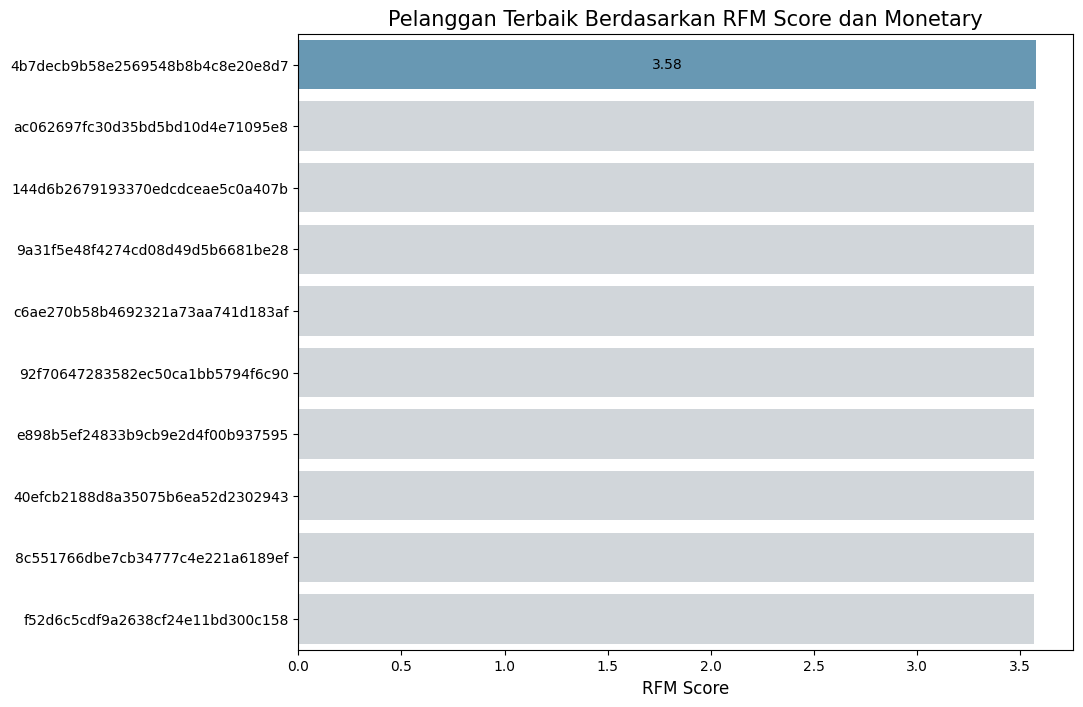

In [82]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#5c9cbf'] + ["#d0d6db"]*9

sns.barplot(x="RFM_Score", y="customer_id", data= rfm_df.sort_values(by=['RFM_Score', 'monetary'],ascending=False).head(10), palette=colors)
ax.set_ylabel(None)
ax.set_xlabel('RFM Score', fontsize=12)
ax.set_title("Pelanggan Terbaik Berdasarkan RFM Score dan Monetary", loc="center", fontsize=15)
ax.bar_label(ax.containers[0], label_type='center')
ax.tick_params(axis ='y', labelsize=10)

## **Conclusion**


1. **Conclusion 1** <br>
Revenue growth from 2017 - 2018 has increased by 19.75 which indicates that overall there has been development in a positive direction.


2. **Conclusion 2** <br>
   **Top 10 highest** selling product category is :
    1. bed_bath_table with 9804 value
    2. health_beauty
    3. sports_leisure
    4. computers_accessories
    5. furniture_decor
    6. housewares
    7. watches_gifts
    8. telephony
    9. toys

    **Top 10 lowest** selling product category is
    1. computers with only 1 value
    2. security_and_services
    3. furniture_mattress_and_upholstery
    4. fashion_childrens_clothes
    5. la_cuisine
    6. cds_dvds_musicals
    7. arts_and_craftmanship
    8. home_comfort_2
    9. fashion_sport
    10. diapers_and_hygiene


3. **Conclusion 3** <br>
    74.5 % of customers used credit card to do transaction


4. **Conclusion 4**<br>
From RFM analysis, 4b7decb9b58e2569548b8b4c8e20e8d7 become best customer in 2017-2018 with RFM score 3.58

In [83]:
# Save the dataframe to a CSV file named "all_data.csv"
orders_merge.to_csv("all_data.csv", index=False)